In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                  header=None)

In [66]:
df.columns = ['age','sex','cp','restbp','chol','fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [67]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [68]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [69]:
df[df['ca']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [70]:
df[df['thal']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [71]:
to_drop = list(df[df['ca']=='?'].index.values) + list(df[df['thal']=='?'].index.values)

In [72]:
df.drop(to_drop, axis=0, inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


convert'ca' and  

In [74]:
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


Data Exploration

<Axes: xlabel='hd', ylabel='thal'>

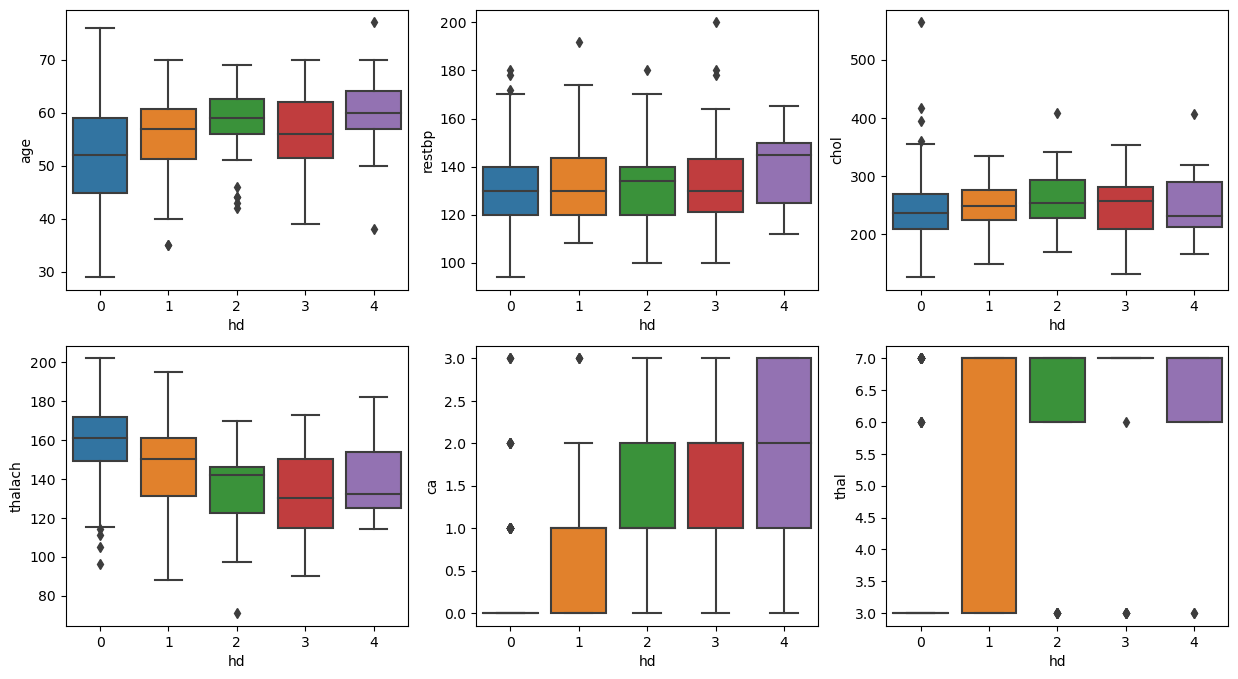

In [76]:
import seaborn as sns

fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,8))

sns.boxplot(x='hd',y='age',data=df,ax=ax1)
sns.boxplot(x='hd',y='restbp',data=df,ax=ax2)
sns.boxplot(x='hd',y='chol',data=df,ax=ax3)
sns.boxplot(x='hd',y='thalach',data=df,ax=ax4)
sns.boxplot(x='hd',y='ca',data=df,ax=ax5)
sns.boxplot(x='hd',y='thal',data=df,ax=ax6)

Check the categorical variables

In [77]:
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
hd,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13


In [78]:
# map 1-4 to type = 1

mapping = {0:0, 1:1, 2:1, 3:1, 4:1}
df['hd_cons'] = df['hd'].map(mapping)

In [79]:
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd_cons
hd,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [80]:
df.groupby('hd_cons').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
hd_cons,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137,137


<Axes: xlabel='hd_cons', ylabel='thalach'>

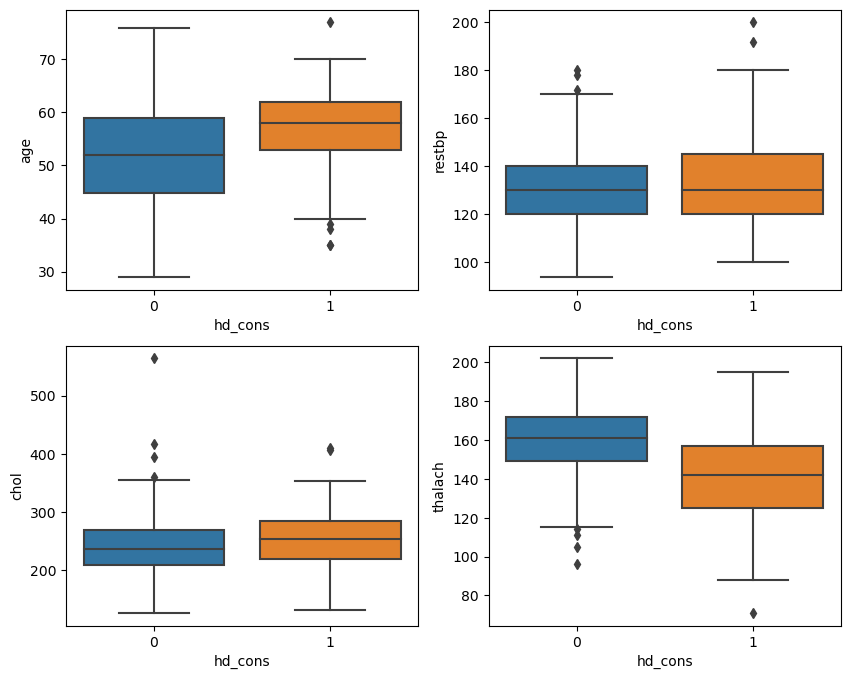

In [81]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd_cons',y='age', data=df, ax=ax1)
sns.boxplot(x='hd_cons',y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd_cons',y='chol', data=df, ax=ax3)
sns.boxplot(x='hd_cons',y='thalach', data=df, ax=ax4)

In [82]:
df.groupby(['hd','sex'])['thal'].count().unstack()

sex,0.0,1.0
hd,,
0,71,89
1,9,45
2,7,28
3,7,28
4,2,11


In [83]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd', 'hd_cons'],
      dtype='object')

In [84]:
df.groupby(['hd','cp'])['thal'].count().unstack()

cp,1.0,2.0,3.0,4.0
hd,,,,
0,16.0,40.0,65.0,39.0
1,5.0,6.0,9.0,34.0
2,1.0,1.0,4.0,29.0
3,NaN,2.0,4.0,29.0
4,1.0,NaN,1.0,11.0


In [85]:
df.groupby(['hd','fbs'])['thal'].count().unstack() #blood sugar may not be a great predictive variable

fbs,0.0,1.0
hd,,
0,137,23
1,51,3
2,27,8
3,27,8
4,12,1


In [86]:
df.groupby(['hd','restecg'])['thal'].count().unstack()

restecg,0.0,1.0,2.0
hd,,,
0,92.0,1.0,67.0
1,23.0,NaN,31.0
2,18.0,1.0,16.0
3,12.0,1.0,22.0
4,2.0,1.0,10.0


In [87]:
df.groupby(['hd','slope'])['thal'].count().unstack()

slope,1.0,2.0,3.0
hd,,,
0,103,48,9
1,22,30,2
2,7,25,3
3,6,24,5
4,1,10,2


In [88]:
df.groupby(['hd','exang'])['thal'].count().unstack()

exang,0.0,1.0
hd,,
0,137,23
1,30,24
2,14,21
3,12,23
4,7,6


In [89]:
df.groupby(['hd','ca'])['thal'].count().unstack()

ca,0.0,1.0,2.0,3.0
hd,,,,
0,129,21,7,3
1,26,19,6,3
2,8,14,9,4
3,8,8,14,5
4,3,3,2,5


In [90]:
df.groupby(['hd','thal'])['ca'].count().unstack().plot

In [91]:
cat_columns = ['sex','cp','restecg','slope','ca','thal','exang','fbs']

<Axes: xlabel='hd'>

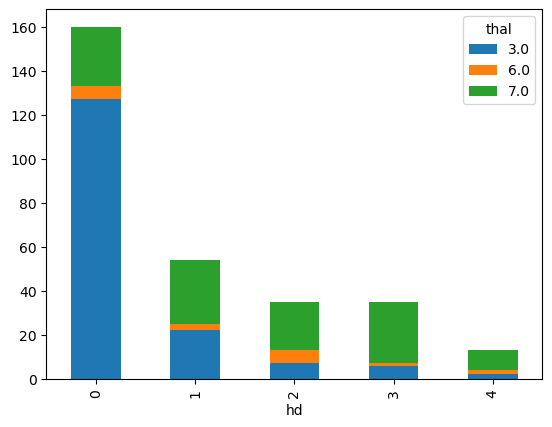

In [92]:
df.groupby(['hd','thal'])['ca'].count().unstack().plot(kind='bar', stacked=True)

In [93]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd', 'hd_cons'],
      dtype='object')

In [94]:
cat_columns = ['sex','cp','restecg','slope','ca','thal','exang','fbs']

In [95]:
X = df.iloc[:,:13]
Y = df.iloc[:,13]

In [111]:
Y_v2 = df.iloc[:,14]

In [112]:
X_encoded = pd.get_dummies(x,columns =cat_columns,dtype = int)

In [113]:
X_encoded

,age,restbp,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,Y, random_state=123)

In [115]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

[Text(0.5681818181818182, 0.9583333333333334, 'thal_3.0 <= 0.5\ngini = 0.644\nsamples = 222\nvalue = [120, 43, 24, 25, 10]\nclass = 0'),
 Text(0.29545454545454547, 0.875, 'cp_4.0 <= 0.5\ngini = 0.784\nsamples = 96\nvalue = [24, 23, 19, 21, 9]\nclass = 0'),
 Text(0.1259469696969697, 0.7916666666666666, 'oldpeak <= 2.4\ngini = 0.645\nsamples = 35\nvalue = [19, 6, 3, 5, 2]\nclass = 0'),
 Text(0.08143939393939394, 0.7083333333333334, 'thalach <= 126.0\ngini = 0.568\nsamples = 31\nvalue = [19, 6, 3, 3, 0]\nclass = 0'),
 Text(0.03787878787878788, 0.625, 'restbp <= 125.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1, 0]\nclass = 2'),
 Text(0.022727272727272728, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]\nclass = 3'),
 Text(0.05303030303030303, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]\nclass = 2'),
 Text(0.125, 0.625, 'restbp <= 176.0\ngini = 0.487\nsamples = 28\nvalue = [19, 6, 1, 2, 0]\nclass = 0'),
 Text(0.08333333333333333, 0.541666

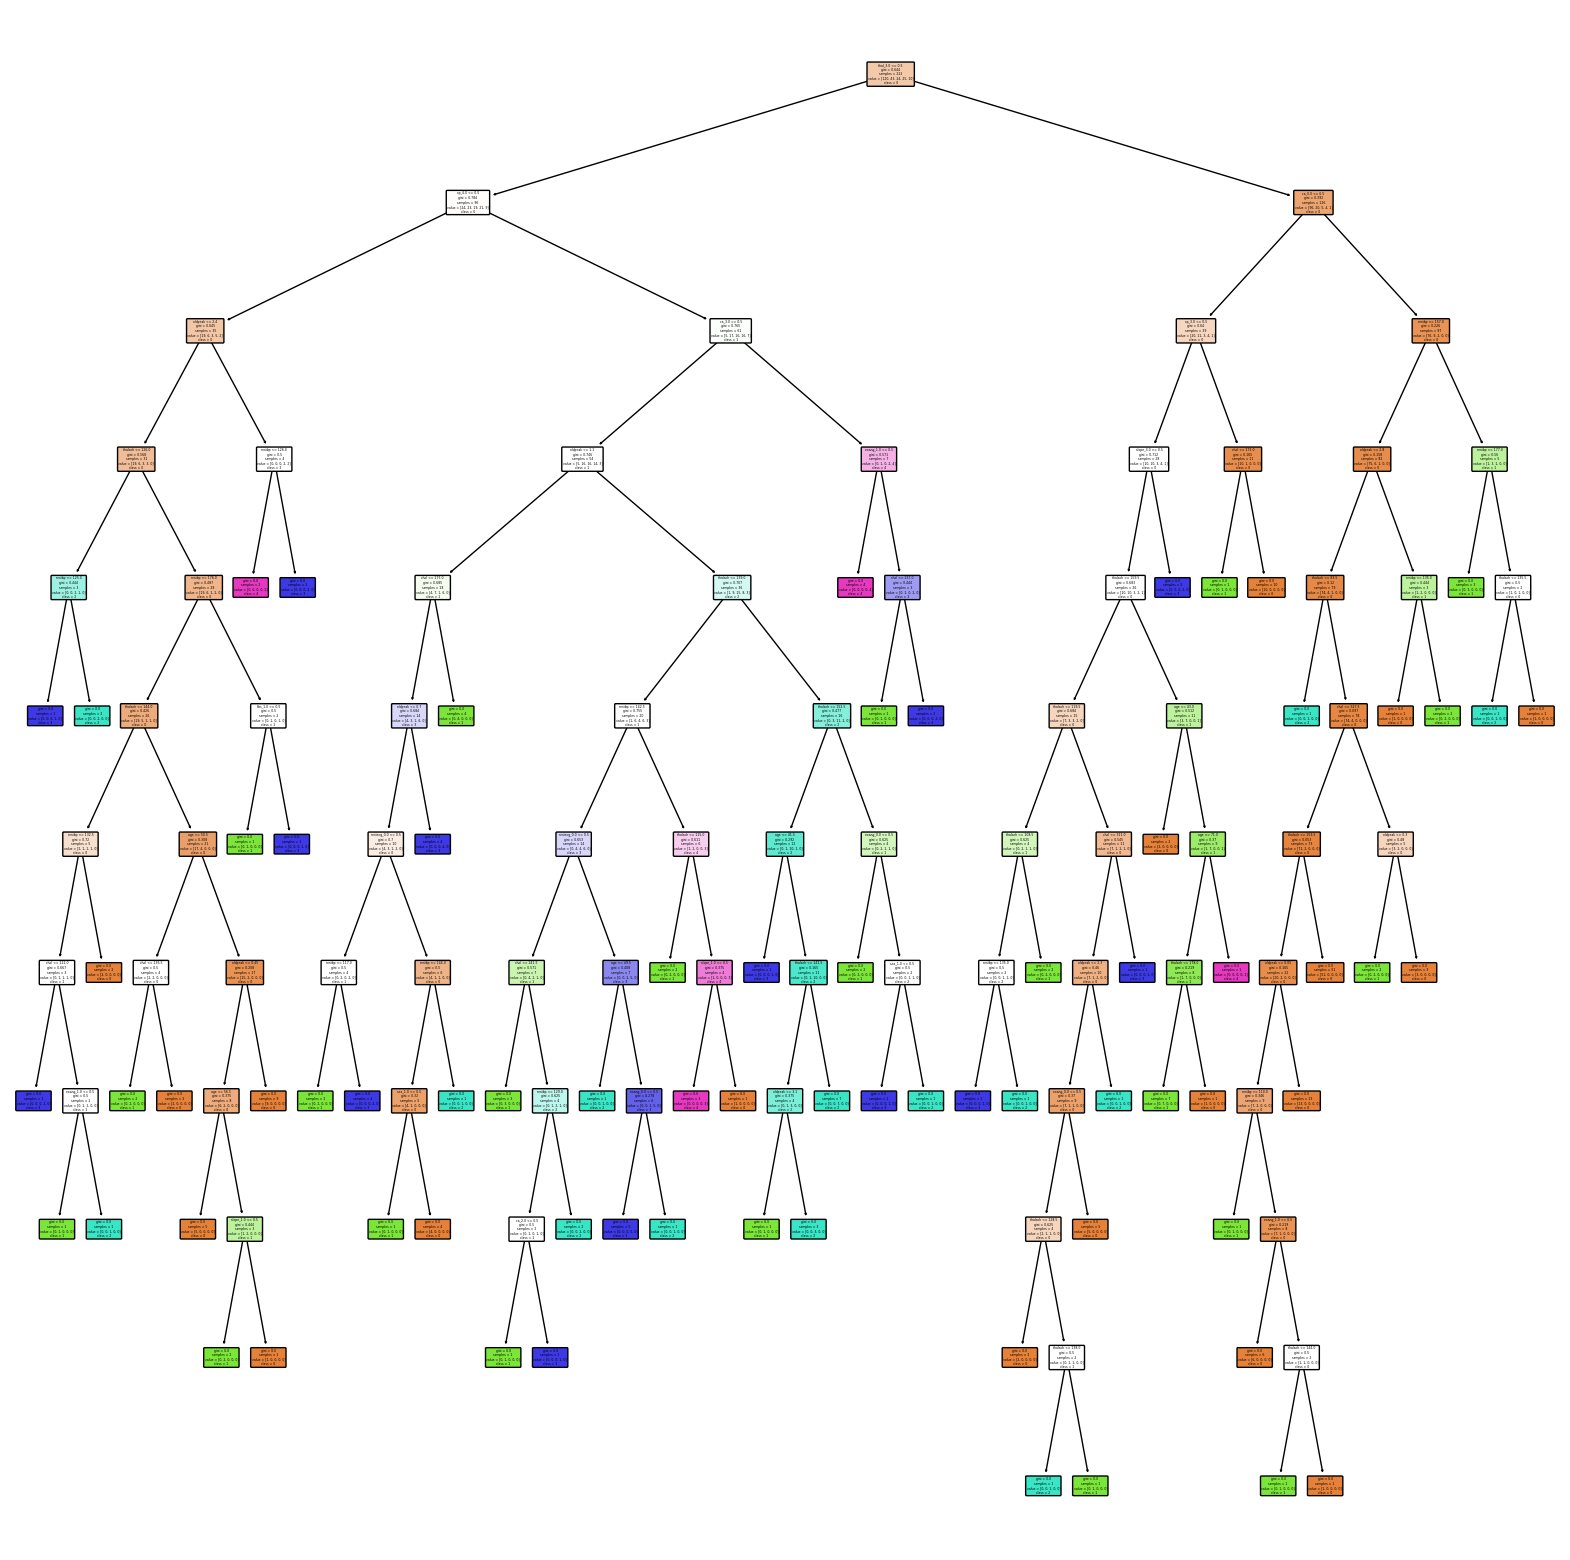

In [116]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns)

In [117]:
#anyone else get an error "Unknown label type: 'continuous-multioutput'" after running the following code: dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

In [ ]:
# another way to not see the text is to store the plot in a variable, and the variable holds the text

In [118]:
plt.savefig #can save it, and you can specify the dpi to save it in a high resolution

<function matplotlib.pyplot.savefig(*args, **kwargs)>

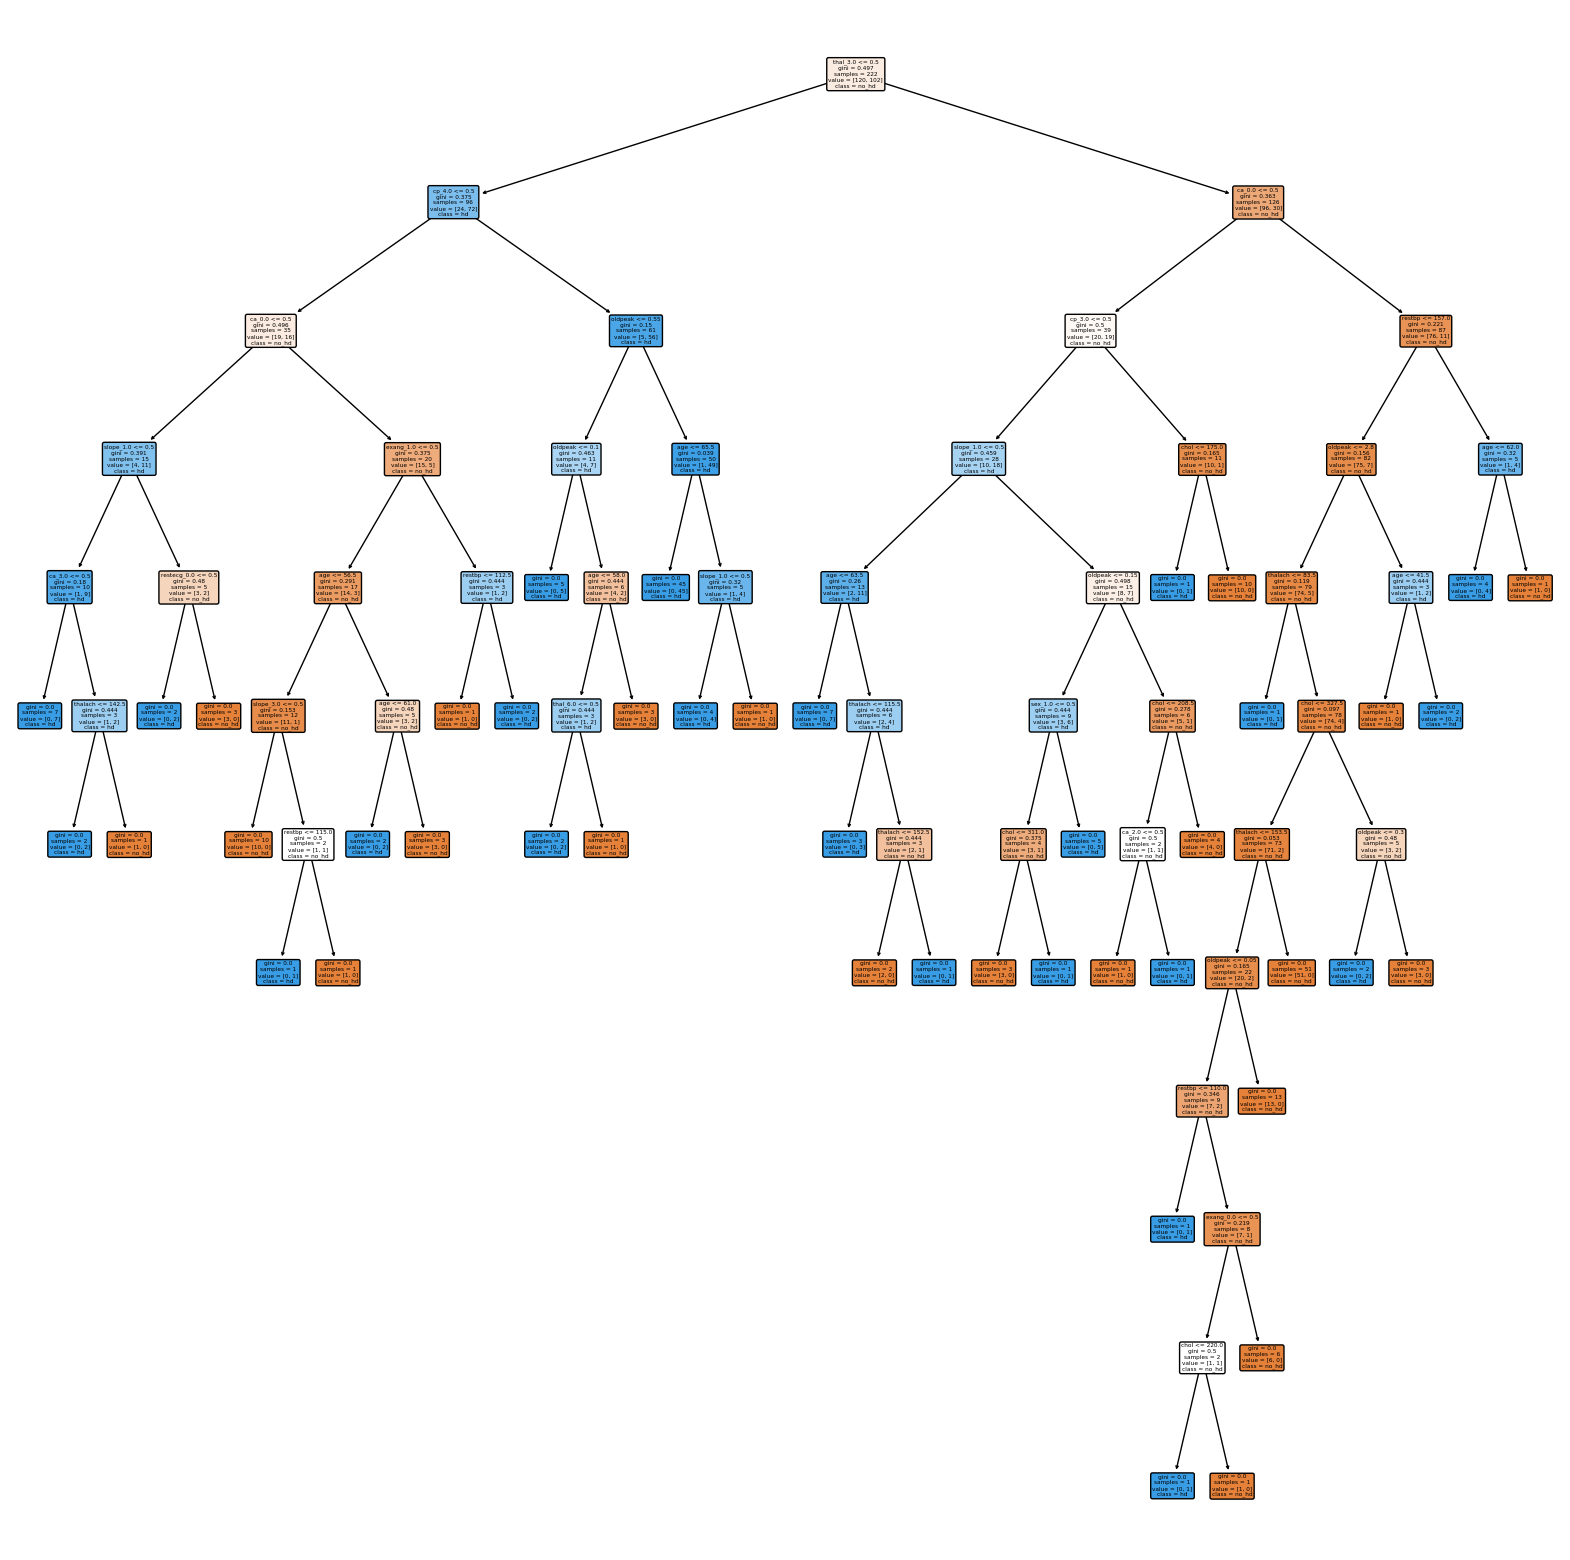

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v2 = DecisionTreeClassifier(random_state=123)
dt_v2 = dt_v2.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(dt_v2, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);

In [ ]:
#for reference if anyone was curious, most high resolution (resolutions > 1440p) laptop screens (13-15 inches) have dpi's >= 200

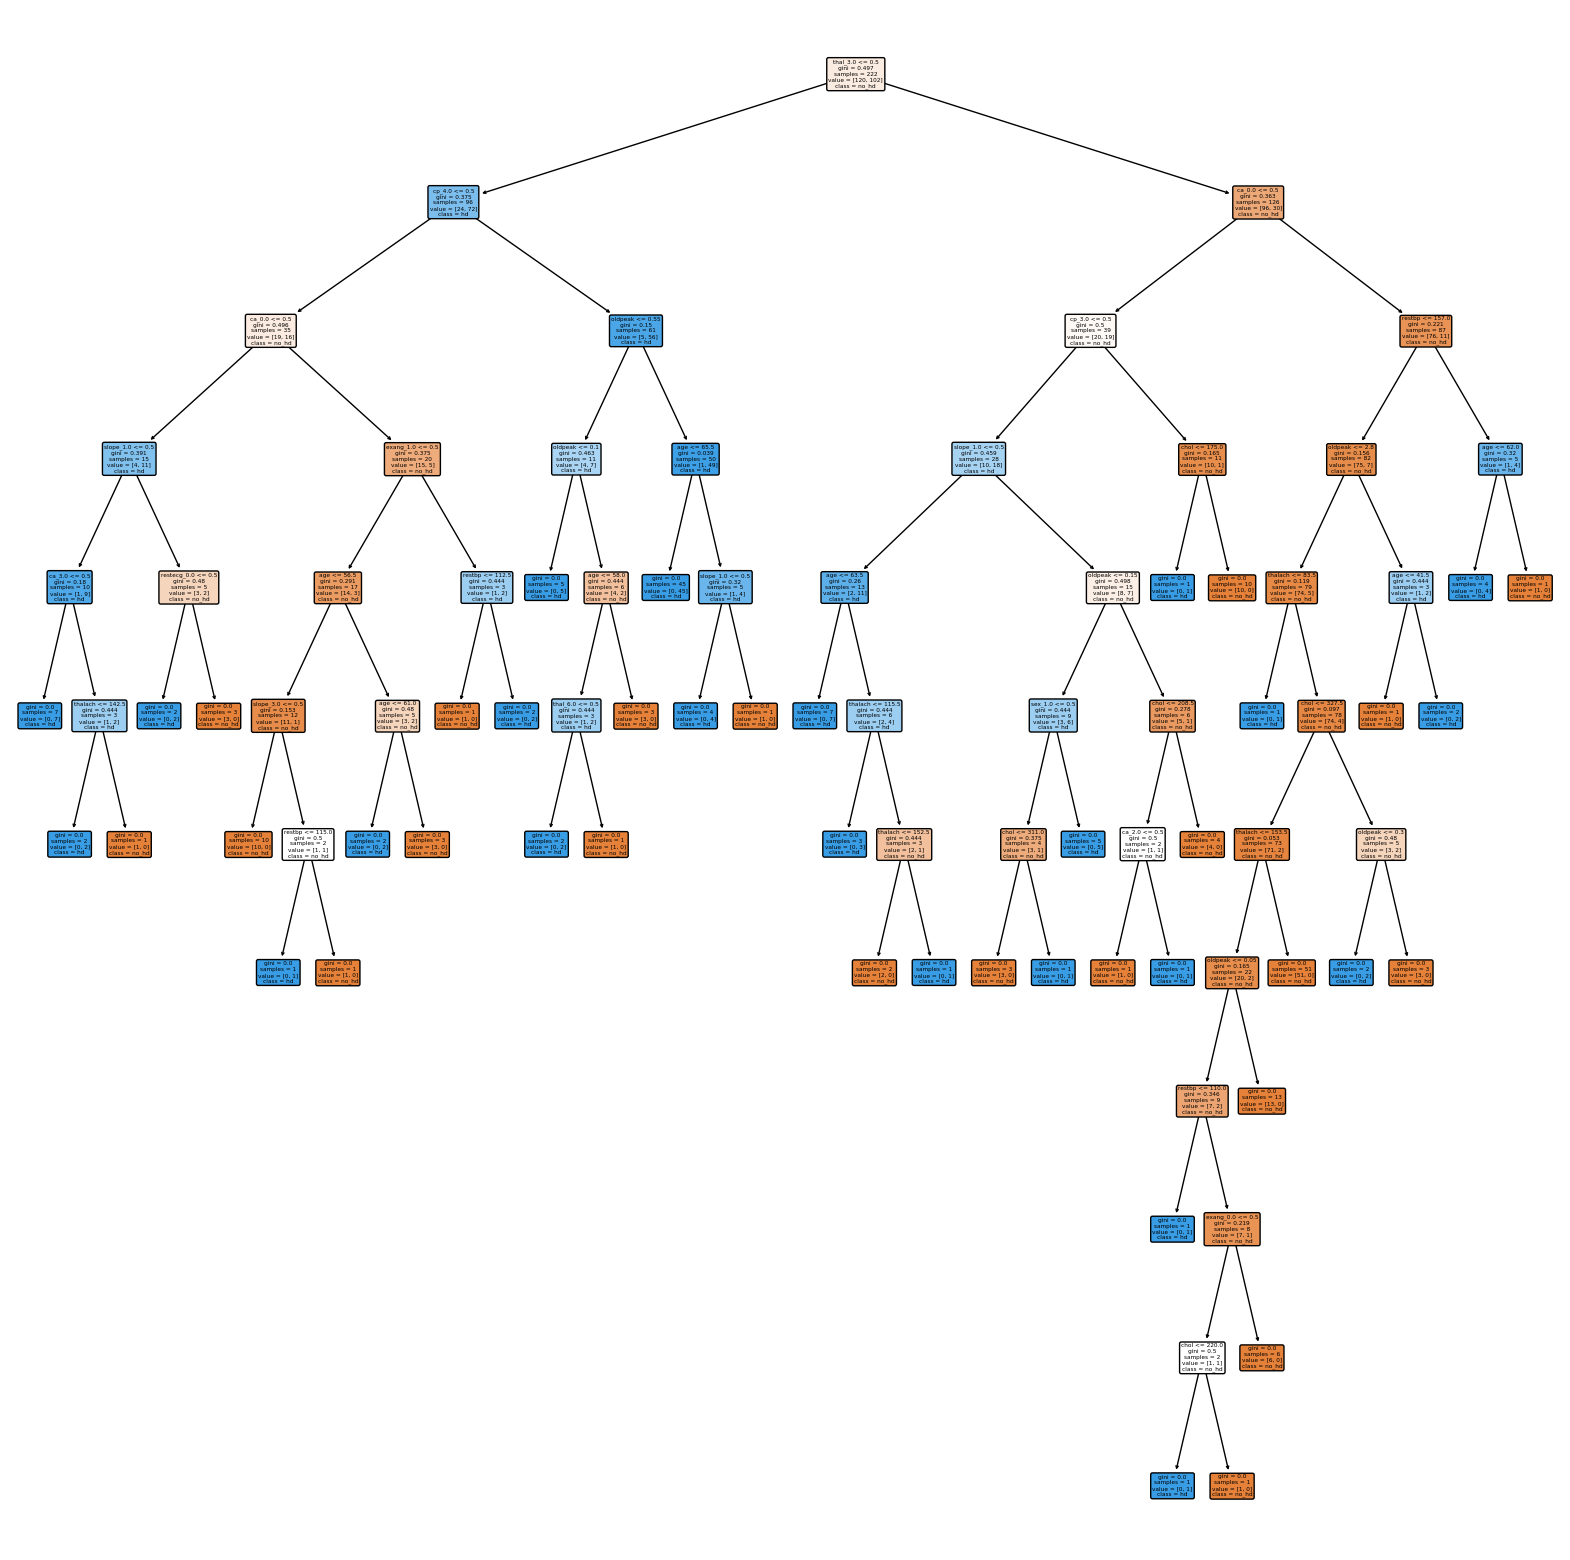

In [120]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v2 = DecisionTreeClassifier(random_state=123)
dt_v2 = dt_v2.fit(X_train2, y_train2)
plt.figure(figsize=(20,20))
plot_tree(dt_v2, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);

In [123]:
predicted = dt.predict(X_test)

In [124]:
predicted_v2 = dt_v2.predict(X_test2)

In [125]:
#if the accuracy of our model is 0.7-0.8, then it is considerably a good model. however, if the accuracy is 0.9-1.0, then your model is probably overfitting, which is bad.
print('v1_model: ', accuracy_score(predicted, y_test))
print('v2_model: ', accuracy_score(predicted_v2, y_test2))

v1_model:  0.49333333333333335
v2_model:  0.7733333333333333


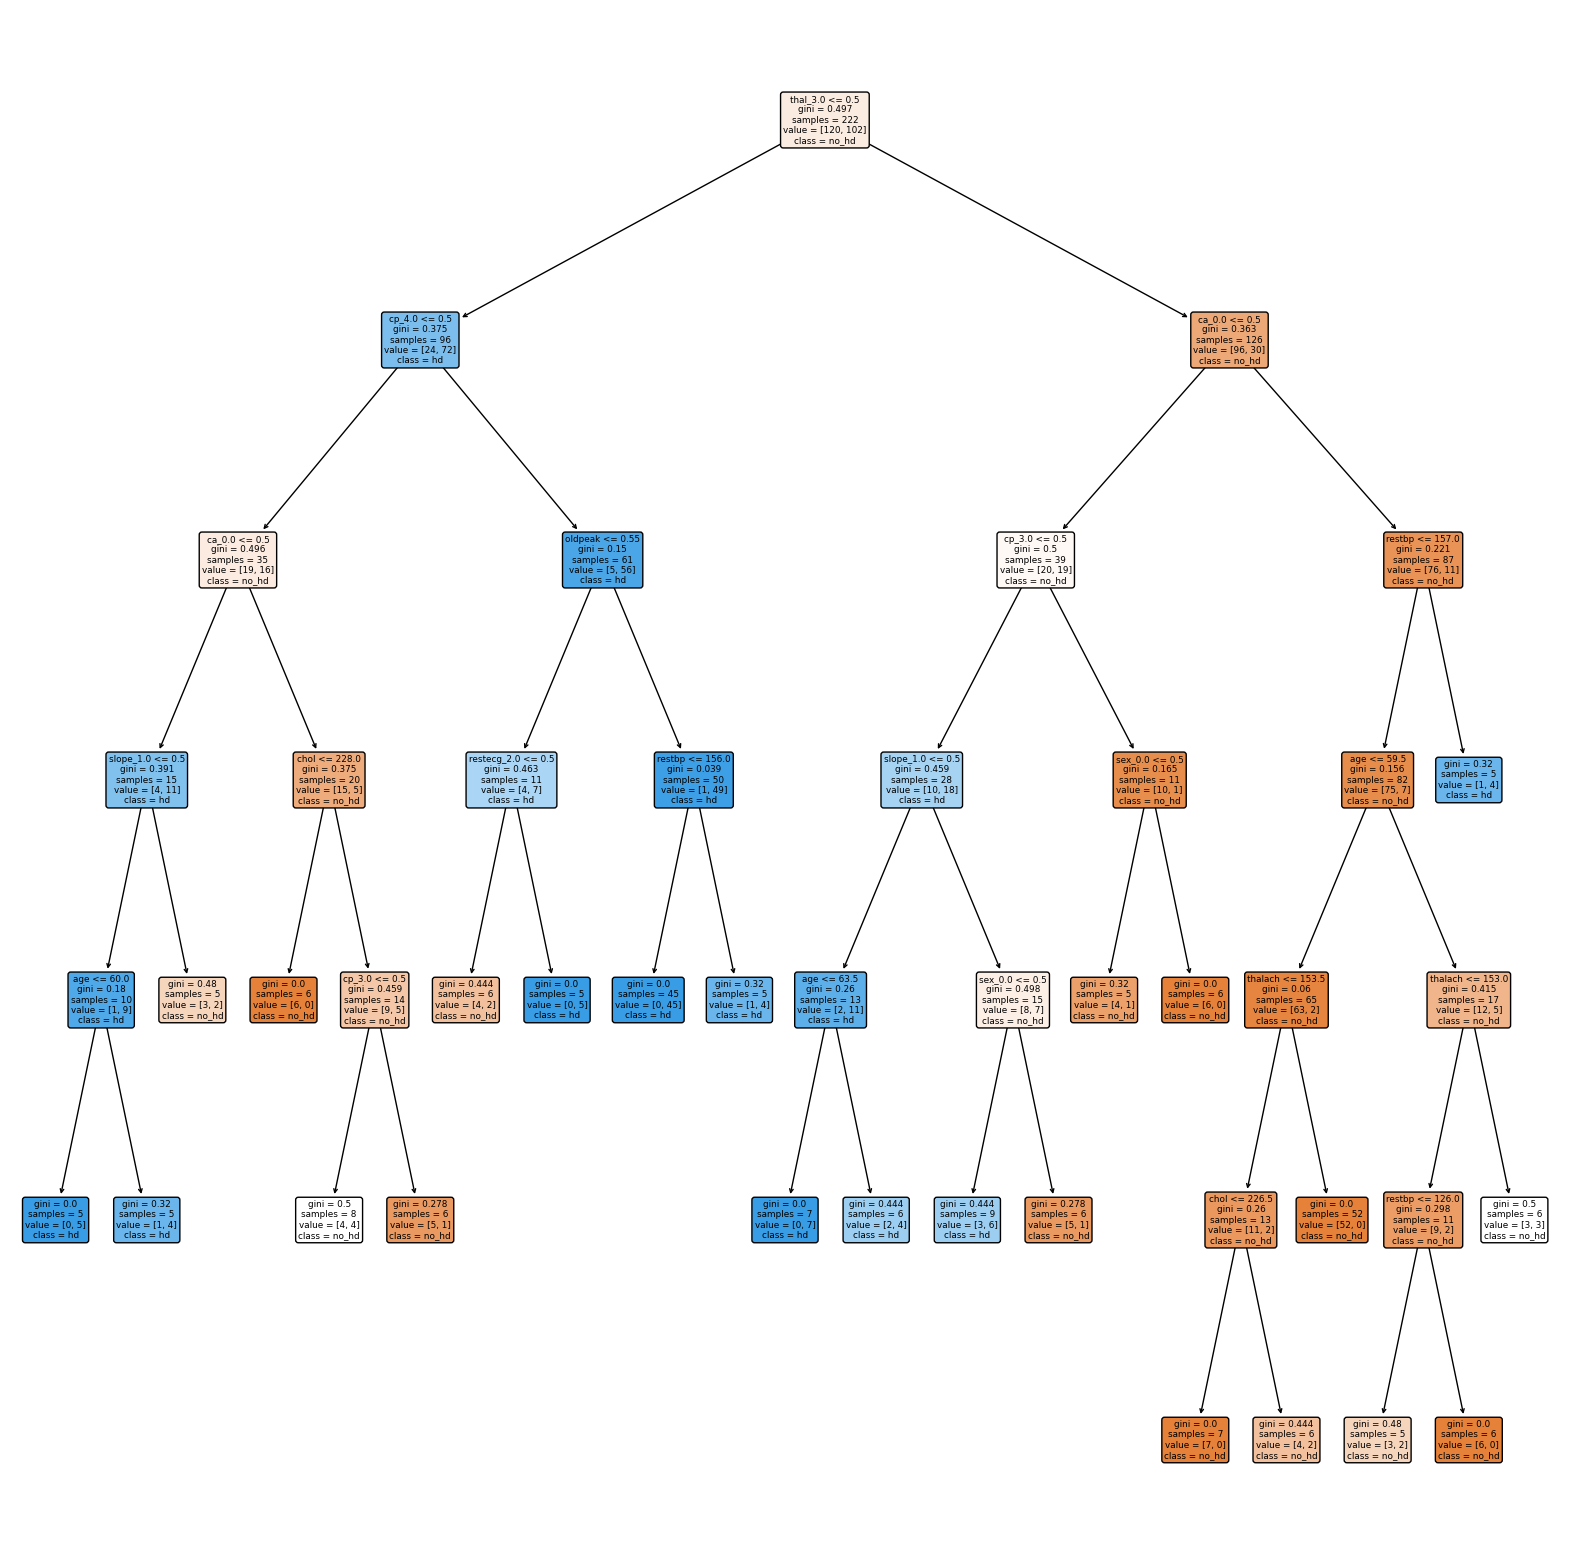

In [126]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v3 = DecisionTreeClassifier(random_state=123, max_depth = 6, min_samples_leaf = 5,)
dt_v3 = dt_v3.fit(X_train3, y_train3)
plt.figure(figsize=(20,20))
plot_tree(dt_v3, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train3, y_train3)
pred3_knn = knn.predict(X_test3)
print(accuracy_score(pred3_knn, y_test3))

0.6266666666666667
